# Clustering

# Partie 1- Analyse de données

## 1- Importation de données

In [42]:
#Librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.metrics import r2_score, mean_squared_error
import dalex as dx
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.tree import plot_tree
import yellowbrick 
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import plotly as px
import plotly.graph_objects as go
import plotly.express as px

In [43]:
df=pd.read_csv("auto-mpg.csv",delimiter=",")
df

18.0  8  307.0  130.0  3504.0  12.0  70  1 chevrolet chevelle malibu
0    15.0  8  350.0  165.0  3693.0  11.5  70  1         buick skylark 320
1    18.0  8  318.0  150.0  3436.0  11.0  70  1        plymouth satellite
2    16.0  8  304.0  150.0  3433.0  12.0  70  1             amc rebel sst
3    17.0  8  302.0  140.0  3449.0  10.5  70  1               ford torino
4    15.0  8  429.0  198.0  4341.0  10.0  70  1          ford galaxie 500
..    ... ..    ...    ...     ...   ...  .. ..                       ...
392  27.0  4  140.0   86.0  2790.0  15.6  82  1           ford mustang gl
393  44.0  4   97.0   52.0  2130.0  24.6  82  2                 vw pickup
394  32.0  4  135.0   84.0  2295.0  11.6  82  1             dodge rampage
395  28.0  4  120.0   79.0  2625.0  18.6  82  1               ford ranger
396  31.0  4  119.0   82.0  2720.0  19.4  82  1                chevy s-10

[397 rows x 9 columns]

In [44]:
#Renommons les variables
df=df.rename(columns = {'18.0': 'mpg', '8': 'cylinders','307.0': 'displacement','130.0': 'horsepower','3504.0': 'weight','12.0': 'acceleration',
                     '70': 'model_year','1': 'origin','chevrolet chevelle malibu': 'car_name'})
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    15.0          8         350.0       165.0  3693.0          11.5   
1    18.0          8         318.0       150.0  3436.0          11.0   
2    16.0          8         304.0       150.0  3433.0          12.0   
3    17.0          8         302.0       140.0  3449.0          10.5   
4    15.0          8         429.0       198.0  4341.0          10.0   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         140.0        86.0  2790.0          15.6   
393  44.0          4          97.0        52.0  2130.0          24.6   
394  32.0          4         135.0        84.0  2295.0          11.6   
395  28.0          4         120.0        79.0  2625.0          18.6   
396  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin            car_name  
0            70       1   buick skylark 320  
1            70       1  plymouth satellite  
2            70       1       amc rebel sst  
3            70       1         ford torino  
4            70       1    ford galaxie 500  
..          ...     ...                 ...  
392          82       1     ford mustang gl  
393          82       2           vw pickup  
394          82       1       dodge rampage  
395          82       1         ford ranger  
396          82       1          chevy s-10  

[397 rows x 9 columns]

Notre jeu de données contient:
Nombre d'instances : 398

Nombre d'attributs : 9, y compris l'attribut de classe

1. mpg :           continu
2. cylinders :     discret à valeurs multiples
3. displacement :   continu
4. horsepower :     continu
5. weight :         continu
6. acceleration :  continu
7. model_year :    discret à valeurs multiples
8. origin:       discret à valeurs multiples
9. car_name:  chaîne de caractères (unique pour chaque instance)

# 2-Analyse de données

In [45]:
#Dimension de notre dataset
df.shape 

(397, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model_year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car_name      397 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


In [47]:
#On supprime la variable car_names car elle ne sera pas utile dans notre analyse
df=df.drop(['car_name'], axis=1)

In [48]:
#Statistiques des différentes variables
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  397.000000  397.000000    397.000000  391.000000   397.000000   
mean    23.528463    5.448363    193.139798  104.404092  2969.080605   
std      7.820926    1.698329    104.244898   38.518732   847.485218   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.000000   75.000000  2223.000000   
50%     23.000000    4.000000    146.000000   93.000000  2800.000000   
75%     29.000000    8.000000    262.000000  125.000000  3609.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    397.000000  397.000000  397.000000  
mean      15.577078   76.025189    1.574307  
std        2.755326    3.689922    0.802549  
min        8.000000   70.000000    1.000000  
25%       13.900000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.200000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [49]:
# Données manquantes?
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [50]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

mpg             0.000000
cylinders       0.000000
displacement    0.000000
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
horsepower      0.015113
dtype: float64

La variable horsepower présente 6 données manquantes(0.015%).
On va donc supprimer les lignes qui contiennt ces données manquantes

In [51]:
#Suppression des lignes présentant des données manquantes
df= df.dropna()

In [52]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [53]:
#Il y a t-il des données dupliquées?
df.duplicated().sum()

0

## Zoom sur les variables

In [54]:
# Pourcentage de voitures fabriquées par an de 1970 à 1982
colors = px.colors.qualitative.Set3
fig = px.pie(df, names='model_year', color_discrete_sequence=colors)                                    
fig.show()

model_year représente l'année à laquelle les voitures ont été fabriquées. Elle va de 1970 à 1982. Nous avons constaté à travers le diagramme circulaire que la plupart des voitures (10,2%) ont été fabriquées en 1973.

In [55]:
# Distribution des origines des voitures 
fig = px.bar(df['origin'].value_counts().reset_index(), x='index', y='origin', color='index', 
             color_continuous_scale='RdBu', labels={'index':'origin', 'origin':'Count'})

fig.update_layout(title='Distribution des origines des voitures')
fig.update_xaxes(title='origin')
fig.update_yaxes(title='Count')

fig.show()


La plupart des voitures sont d'origine 1 (244), 68 voitures sont d'origine 2 et 79 d'origine 3

In [56]:
fig = px.bar(df['cylinders'].value_counts().reset_index(), x='index', y='cylinders', color='index', 
             color_continuous_scale='RdBu', labels={'index':'cylinders', 'origin':'Count'})

fig.update_xaxes(title='cylinders')
fig.update_yaxes(title='Count')

fig.show()


Nous avons 6 modalités de la variable cylinders. La modalité qui a le plus d'effectifs est 4 suivie de 8

C:\Users\Etudiant\AppData\Local\Temp\ipykernel_9316\439133452.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



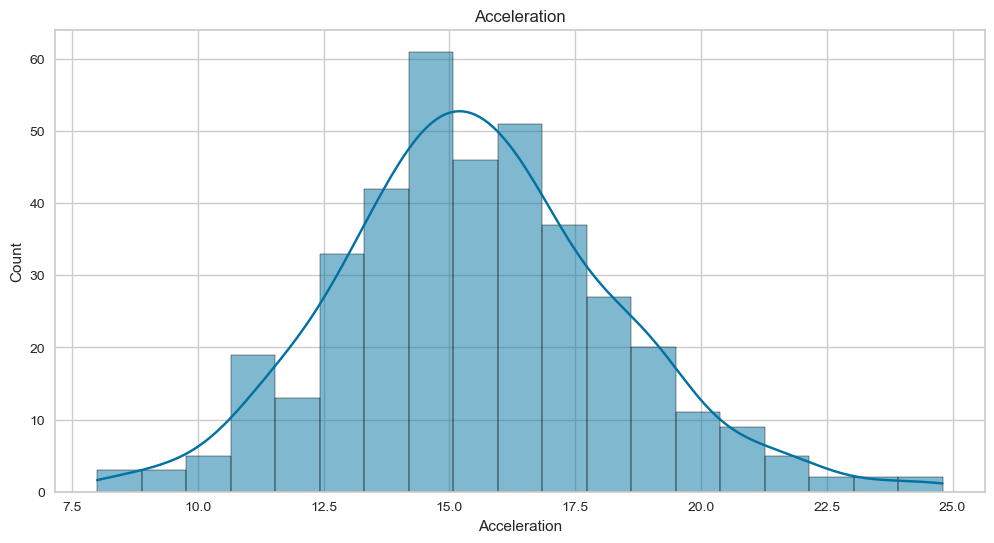

In [57]:
#Distribution de la viriable Acceleration
plt.figure(figsize=(12, 6))
sn.histplot(data=df, x='acceleration', kde=True, palette='husl')
plt.title('Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Count')
plt.show()


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_9316\1536063532.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



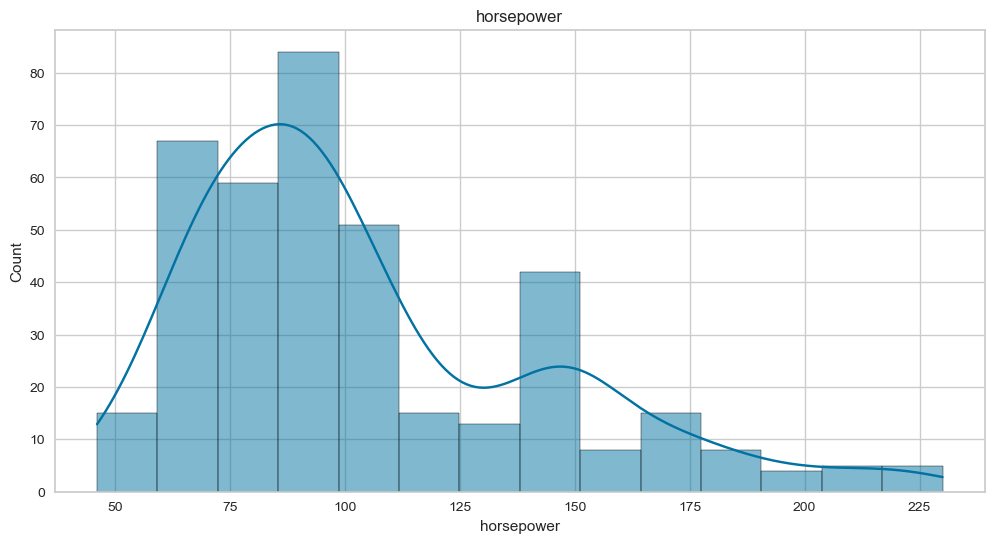

In [58]:
#Distribution de la variable horsepower
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='horsepower', kde=True, palette='husl')
plt.title('horsepower')
plt.xlabel('horsepower')
plt.ylabel('Count')
plt.show()


In [74]:
#Un graphe intéractif
import plotly.express as px

fig = px.scatter_3d(df, x='cylinders', y='weight', z='mpg', color='mpg', title='Relation entre mpg, cylinders et weights')
fig.update_layout(width=1000, height=600)
fig.show()

Chaque point dans le graphique représente une voiture de votre ensemble de données.
La couleur de chaque point représente la consommation de carburant ('mpg'). Les points de la même couleur ont des valeurs de consommation de carburant similaires.

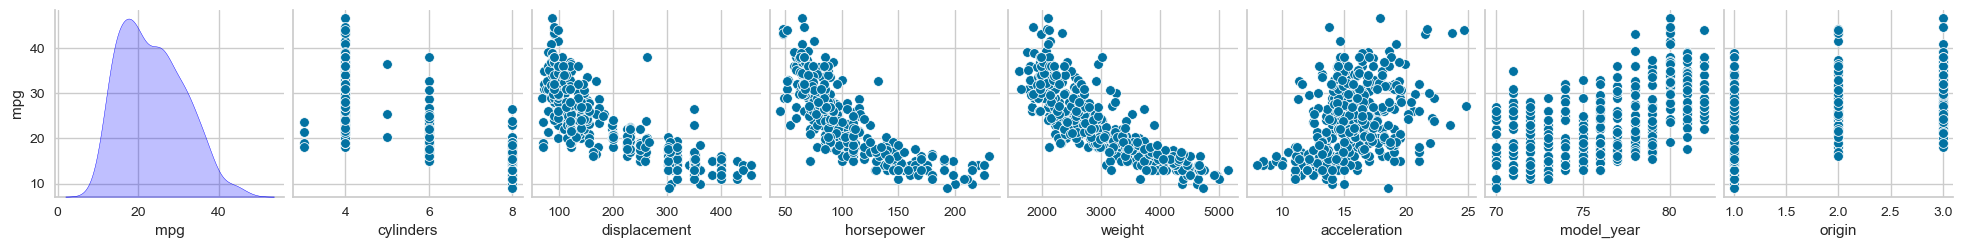

In [75]:
#Distribution de la variable cible mpg ainsi que les corrélations entre mpg et les autres variables
sns.pairplot(df, y_vars=['mpg'], diag_kind='kde', diag_kws={'color': 'blue'})
plt.show()

On remarque une sorte de corrélation négative entre la variable cible et displacement, horsepower, weight, 
et une corrélation positive entre mpg et acceleration.

Affichons la matrice de corrélation pour voir de plus près le lien entre les différentes variables

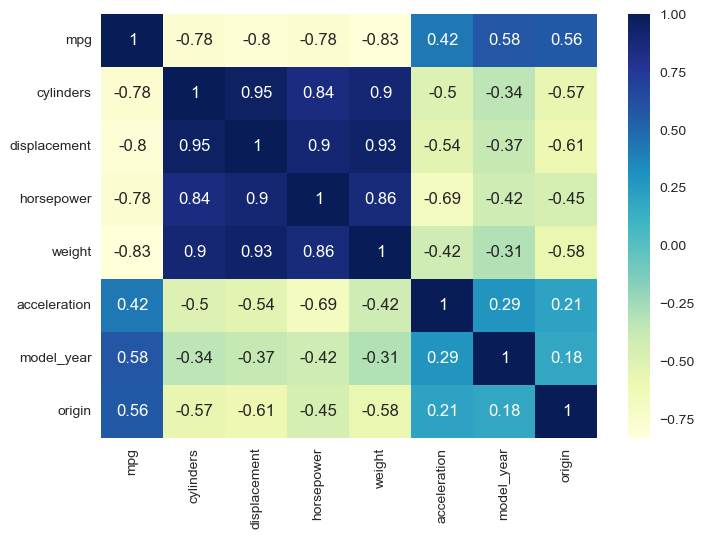

In [77]:
#Matrice de corrélation entre les variables
Matrice_corr = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Nous avons plusieurs corrélations positives, négatives entre les varaibles, dont une forte corrélation positive entre cylinders et displacement et une forte corrélation négative entre mpg et weight. On a une faible corrélation positive entre origin et model_year...

La corrélation positive entre cylinders et displacement est cohérente avec les principes de la mécanique automobile. En général, plus le nombre de cylindres d'un moteur est élevé, plus sa cylindrée (displacement) est grande. Cela signifie que les moteurs avec un plus grand nombre de cylindres ont tendance à avoir une plus grande capacité de déplacement, ce qui est souvent associé à une puissance moteur accrue.

La corrélation négative entre mpg et weight est également logique et courante dans les études sur la consommation de carburant des véhicules. En règle générale, plus une voiture est lourde, plus elle consomme de carburant. Cela s'explique par le fait que les véhicules plus lourds nécessitent plus d'énergie pour se déplacer et ont souvent des moteurs plus puissants pour compenser cela, ce qui entraîne une consommation de carburant plus élevée. Ainsi, une corrélation négative forte entre la consommation de carburant (mpg) et le poids du véhicule est attendue.

La corrélation positive faible entre origin et model_year positive faible indique une tendance où les véhicules originaires d'une même région ont tendance à être fabriqués dans des années de modèle similaires. Cela peut être dû à des facteurs tels que les normes de fabrication régionales, les préférences des consommateurs ou les tendances de conception. Cependant, cette corrélation est relativement faible, ce qui suggère que d'autres facteurs peuvent également influencer l'année de fabrication des véhicules, en dehors de leur origine géographique.

# Partie 2
### 1- Définition de la variable cible et des données

In [78]:
X=df.drop('mpg', axis=1)
X

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         350.0       165.0  3693.0          11.5          70   
1            8         318.0       150.0  3436.0          11.0          70   
2            8         304.0       150.0  3433.0          12.0          70   
3            8         302.0       140.0  3449.0          10.5          70   
4            8         429.0       198.0  4341.0          10.0          70   
..         ...           ...         ...     ...           ...         ...   
392          4         140.0        86.0  2790.0          15.6          82   
393          4          97.0        52.0  2130.0          24.6          82   
394          4         135.0        84.0  2295.0          11.6          82   
395          4         120.0        79.0  2625.0          18.6          82   
396          4         119.0        82.0  2720.0          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
392       1  
393       2  
394       1  
395       1  
396       1  

[391 rows x 7 columns]

In [79]:
#Variable cible
y=df['mpg']
y

0      15.0
1      18.0
2      16.0
3      17.0
4      15.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 391, dtype: float64

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [88]:
#Séparation des données en 80% d'apprentissage et 20% de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,random_state=22, test_size =0.2)
print('La taille de l_ensemble d_entrainement est:', X_train.shape)
print('La taille de l_ensemble de test ', X_test.shape)

La taille de l_ensemble d_entrainement est: (312, 7)
La taille de l_ensemble de test  (79, 7)


# 2- Arbre de régression de type CART

Nous allons effectuer une recherche de la meilleure profondeur maximale (max_depth) 
pour notre modèle d'arbre de régression

In [90]:
from sklearn.tree import DecisionTreeRegressor

Liste = list(range(2, 12))
scores = []
for i in Liste:
    modele = DecisionTreeRegressor(max_depth=i, min_samples_split=7, min_samples_leaf=8, max_features='sqrt', random_state=0) 
    modele.fit(X_train, y_train)
    scores.append(modele.score(X_test, y_test))

print(scores)


[0.5907378172409492, 0.6844285954510541, 0.7536356414996658, 0.7495121672485707, 0.7696610953071088, 0.8008158736517903, 0.7816245921338812, 0.7578182225482073, 0.7578182225482073, 0.7578182225482073]


En comparant les performances du modèle d'arbre de regression pour différentes valeurs de max_depth,
on voit que le meilleur score R² sur les données de test est 0.8

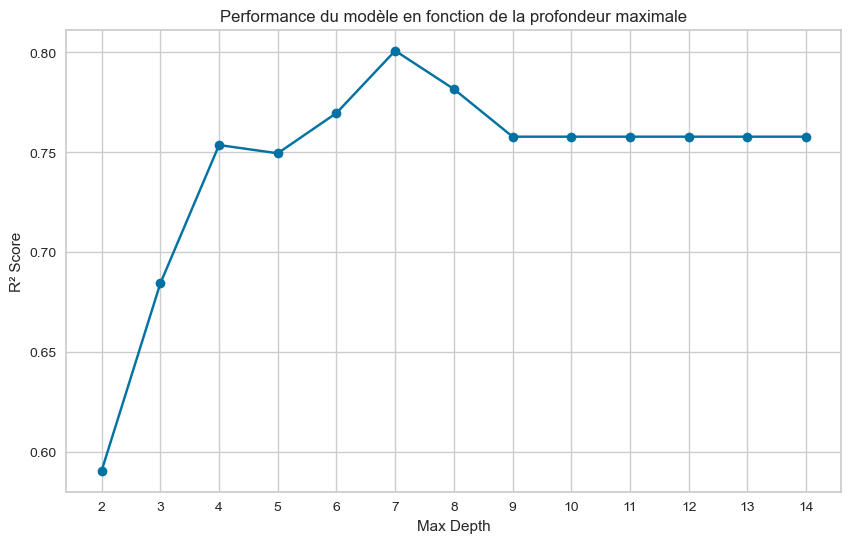

In [91]:
import matplotlib.pyplot as plt
max_depth_range = list(range(2, 15))

Liste2 = []

for depth in max_depth_range:
    modele = DecisionTreeRegressor(max_depth=depth, min_samples_split=7, min_samples_leaf=8, max_features='sqrt', random_state=0)
    modele.fit(X_train, y_train)
    score = modele.score(X_test, y_test)
    Liste2.append(score)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, Liste2, marker='o', linestyle='-')
plt.title('Performance du modèle en fonction de la profondeur maximale')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.xticks(max_depth_range)
plt.grid(True)
plt.show()


La profondeur qui nous donne une meilleure performance est max_depth=7. 

Construction de l'arbre de regression avec la valeur optimale de max_depth qui est 7

In [92]:
clf = DecisionTreeRegressor(max_depth=7,min_samples_split=7, min_samples_leaf=8, max_features='sqrt', random_state = 0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

## 3-Visualisation de l'arbre

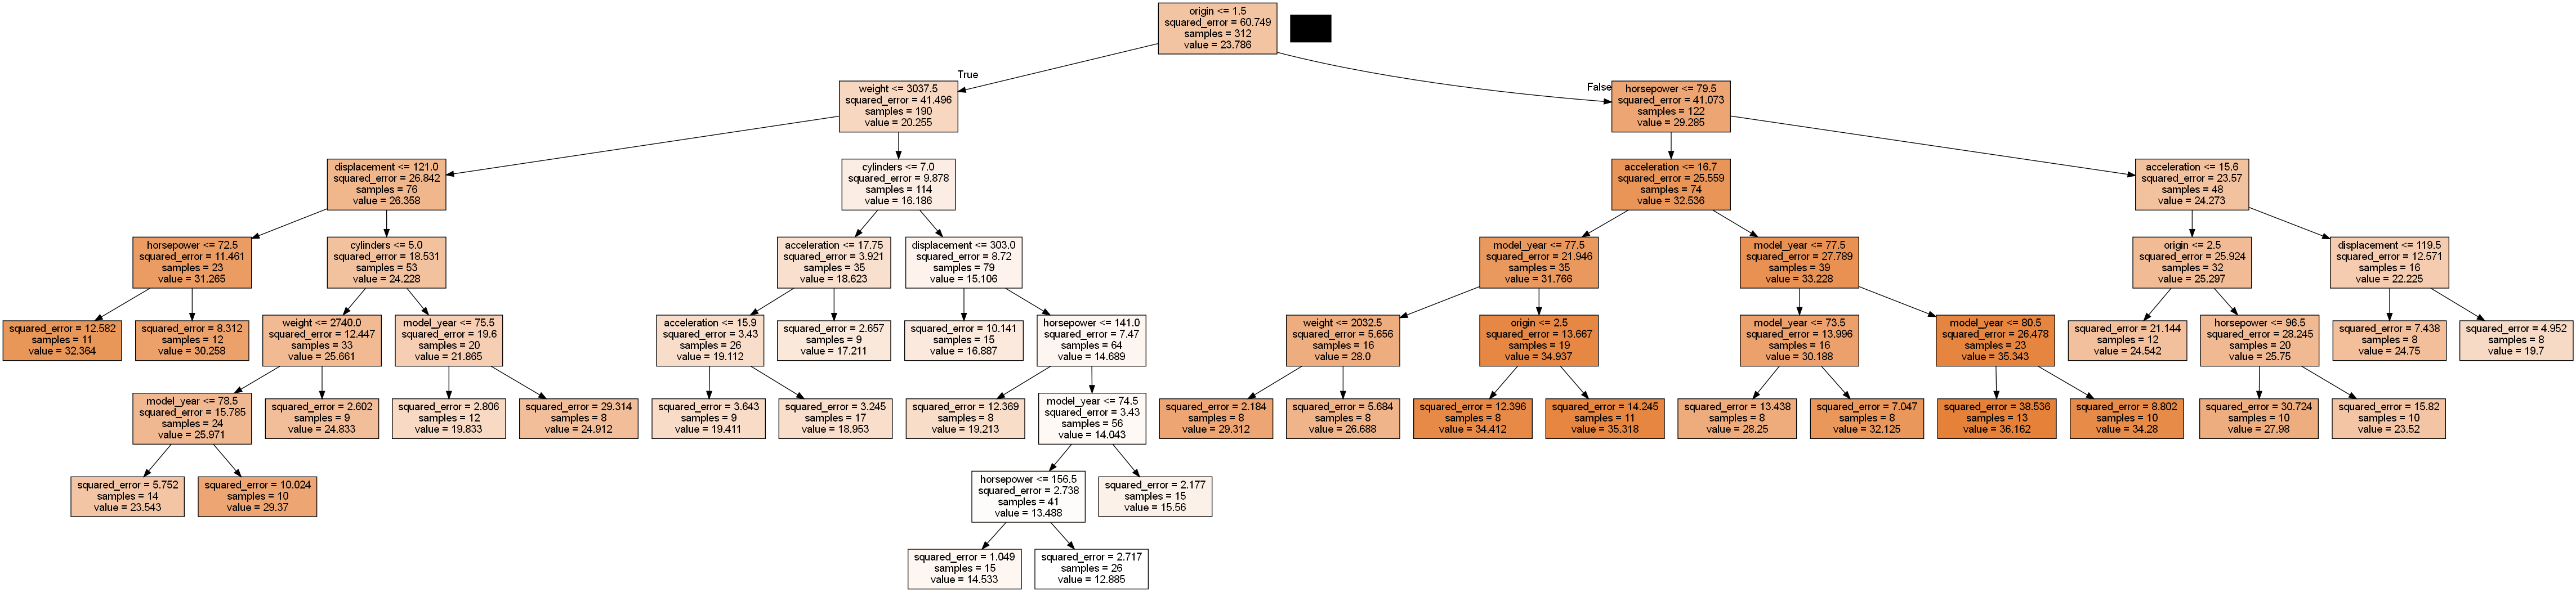

In [93]:
from sklearn import tree
from IPython.display import Image
import pydotplus

Names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=Names, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

La profondeur de notre arbre étant assez grande, notre visualisation n'est donc pas assez visible.

Faisons une affichage textuelle

In [94]:
from sklearn.tree import export_text
tree_text = export_text(clf, feature_names=list(X_train.columns))
print(tree_text)

|--- origin <= 1.50
|   |--- weight <= 3037.50
|   |   |--- displacement <= 121.00
|   |   |   |--- horsepower <= 72.50
|   |   |   |   |--- value: [32.36]
|   |   |   |--- horsepower >  72.50
|   |   |   |   |--- value: [30.26]
|   |   |--- displacement >  121.00
|   |   |   |--- cylinders <= 5.00
|   |   |   |   |--- weight <= 2740.00
|   |   |   |   |   |--- model_year <= 78.50
|   |   |   |   |   |   |--- value: [23.54]
|   |   |   |   |   |--- model_year >  78.50
|   |   |   |   |   |   |--- value: [29.37]
|   |   |   |   |--- weight >  2740.00
|   |   |   |   |   |--- value: [24.83]
|   |   |   |--- cylinders >  5.00
|   |   |   |   |--- model_year <= 75.50
|   |   |   |   |   |--- value: [19.83]
|   |   |   |   |--- model_year >  75.50
|   |   |   |   |   |--- value: [24.91]
|   |--- weight >  3037.50
|   |   |--- cylinders <= 7.00
|   |   |   |--- acceleration <= 17.75
|   |   |   |   |--- acceleration <= 15.90
|   |   |   |   |   |--- value: [19.41]
|   |   |   |   |--- accele

## 4-Importance des variables

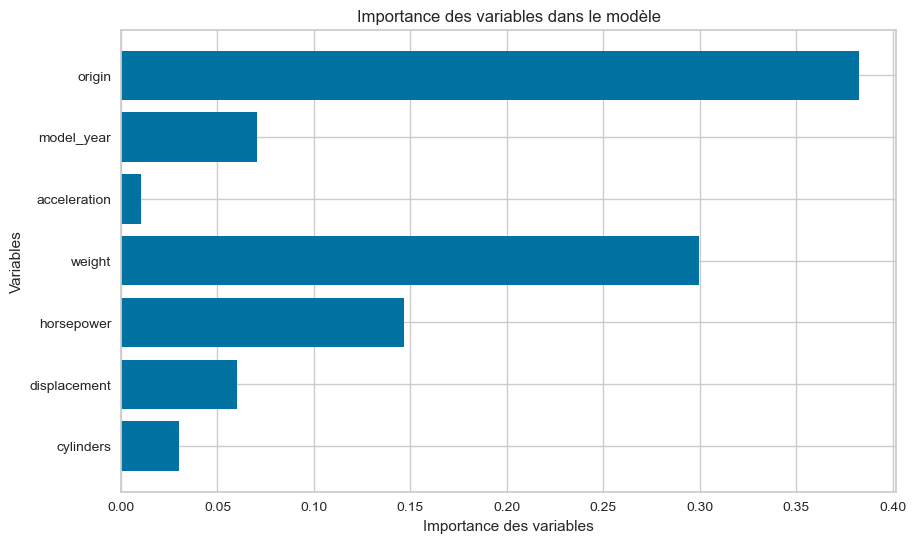

In [95]:
clf.fit(X_train, y_train)

IP = clf.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(IP)), IP, align='center')
plt.yticks(range(len(IP)), feature_names)
plt.xlabel('Importance des variables')
plt.ylabel('Variables')
plt.title('Importance des variables dans le modèle')
plt.show()

On remarque que les variables importantes sont respectivement origin, weight, horsepower et model_year. 
L'origine (origin) du véhicule est donc un facteur très important dans la prédiction de la consommation de carburant. Cela peut indiquer que les véhicules provenant de différentes régions ou pays ont des caractéristiques distinctes qui influent sur leur efficacité énergétique. 

Le fait que le poids du véhicule(weight) soit également un facteur important dans la prédiction de la consommation de carburant est cohérent car plus un véhicule est lourd, plus il nécessite d'énergie pour se déplacer, ce qui se traduit souvent par une consommation de carburant plus élevée.

## 5-Evaluation du modèle

In [98]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

Valeur_metriques = pd.DataFrame({
    'Metriques': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Valeurs': [mse, mae, R2]
})

titre = "Résultats des métriques d'évaluation du modèle arbre de regression"


# Affichage des métriques arbre de décision
print(titre)
print(Valeur_metriques)

Résultats des métriques d'évaluation du modèle arbre de regression
                   Metriques    Valeurs
0   Mean Squared Error (MSE)  11.777830
1  Mean Absolute Error (MAE)   2.548706
2             R-squared (R2)   0.800816


Le MSE est de 11.78, ce qui indique que les prédictions du modèle peuvent varier 
de près de 11 unités carrées en moyenne par rapport aux valeurs réelles.

Comme pour le MSE, plus la valeur de MAE est proche de zéro, meilleure est la performance du modèle. 
Dans notre cas, le MAE est de 2.54, ce qui signifie que les prédictions du modèle peuvent varier 
d'environ 2.54 unités en moyenne par rapport aux valeurs réelles.

Le R² est de 0.80, ce qui signifie que le modèle explique environ 80% de la variance totale dans la variable cible. 
Cela indique une bonne adéquation du modèle aux données, bien qu'il reste une certaine variance non expliquée.

Le modèle de régression a donc une performance raisonnable, mais on peut l'améliorer.

# Random Forest

Préparons une grille de recherche aléatoire pour explorer différentes combinaisons d'hyperparamètres.

In [99]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=15, stop=70, num=15)] # nombre d'arbres

max_features = ['auto', 'sqrt']


max_depth = [int(x) for x in np.linspace(3, 15, num=8)]
max_depth.append(None)  

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

#grille de recherche aléatoire
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [3, 4, 6, 8, 9, 11, 13, 15, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [15, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70]}


On a définit une grille de recherche aléatoire pour l'optimisation des 
hyperparamètres et on a obtenu les resultats ci-dessus 

In [103]:
from sklearn.ensemble import RandomForestRegressor
rand_f = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rand_f, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Etudiant\anaconda3

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 9, 11, 13, 15,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [15, 18, 22, 26, 30, 34,
                                                         38, 42, 46, 50, 54, 58,
                                                         62, 66, 70]},
                   random_state=42, verbose=2)

In [104]:
rf_random.best_params_

{'n_estimators': 18,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

Construction de notre foret aléatoire avec les paramètres retenues

n_estimators': 26,

 'min_samples_split': 5,
 
 'min_samples_leaf': 1,
 
 'max_features': 'sqrt',
 
 'max_depth': 11,
 
 'bootstrap': False

In [105]:
rand_f = RandomForestRegressor(n_estimators=26,max_features='sqrt', min_samples_leaf=1,max_depth=11,bootstrap=False ,min_samples_split=5, random_state = 0)
rand_f.fit(X_train,y_train)
y_test_pred=rand_f.predict(X_test)

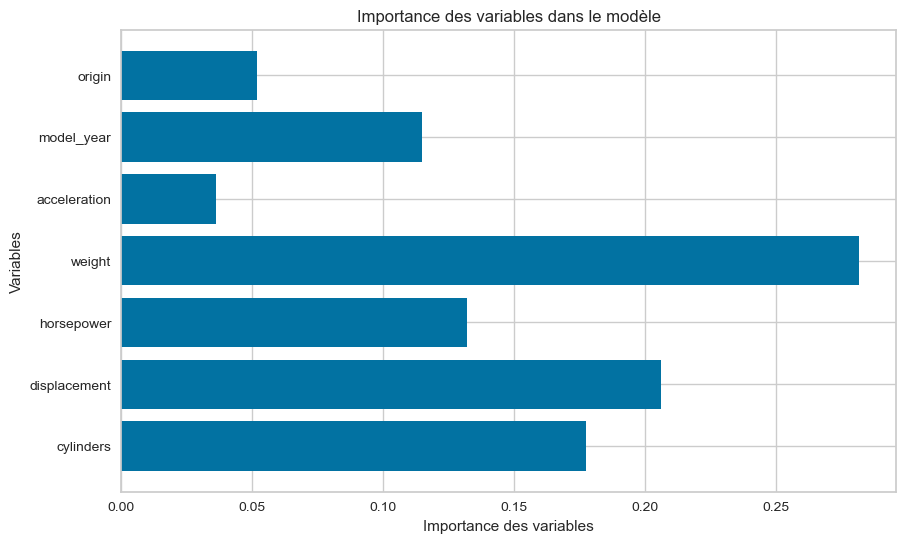

In [106]:
rand_f.fit(X_train, y_train)

IP = rand_f.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(IP)), IP, align='center')
plt.yticks(range(len(IP)), feature_names)
plt.xlabel('Importance des variables')
plt.ylabel('Variables')
plt.title('Importance des variables dans le modèle')
plt.show()

Les varaibles les plus importantes sont respectivement weight, displacement, cylinders. Or pour l'arbre de regression, c'est plutot l'origin qui est plus importante.

La caractéristique la moins importante est l'acceleration autant pour l'arbre de regression que la foret aléatoire.


### Evaluation du modèle pour la foret aléatoire

In [108]:
y_test_pred = rand_f.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
y_test_pred = rand_f.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

Valeur_metriques1 = pd.DataFrame({
    'Métriques': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Valeurs': [mse, mae, R2]
})

titre1 = "Résultats des métriques d'évaluation du modèle Random Forest 1"


# Affichage des métriques rand_f2
print(titre1)
print(Valeur_metriques1)

Résultats des métriques d'évaluation du modèle Random Forest 1
                   Métriques   Valeurs
0   Mean Squared Error (MSE)  6.406803
1  Mean Absolute Error (MAE)  1.717862
2             R-squared (R2)  0.891650


## Construction de la foret aléatoire avec différents parmaètres

### Modèle rand_f2 (foret aléatoire 2)

La grille nous a permis d'avoir ces paramètres. Nous allons choisir quelques uns pour notre deuxième foret aléatoires.

''bootstrap': [True, False], 

 'max_depth': [3, 4, 6, 8, 9, 11, 13, 15, None],
 
 'max_features': ['auto', 'sqrt'],
 
 'min_samples_leaf': [1, 2, 4],
 
 'min_samples_split': [2, 5, 10],
 
 'n_estimators': [15, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70]}

In [109]:
#On retient les paramètres suivants:
#bootstrap: True
#max_depth: 15
#max_features: log2
#min_samples_leaf':4,
#min_samples_split:2
#n_estimators:18

rand_f2= RandomForestRegressor(n_estimators=18,max_features='log2', min_samples_leaf=4, max_depth=15,bootstrap=True, min_samples_split=10, random_state = 0)

rand_f2.fit(X_train,y_train)

y_test_pred=rand_f2.predict(X_test) 

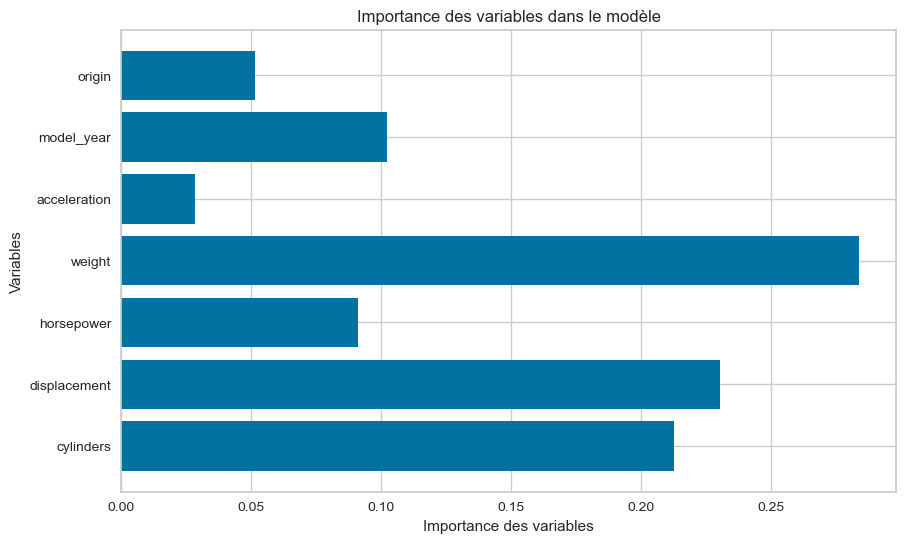

In [110]:
#Importance des variables pour la deuxième foret aléatoire
rand_f2.fit(X_train, y_train)

IP = rand_f2.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(IP)), IP, align='center')
plt.yticks(range(len(IP)), feature_names)
plt.xlabel('Importance des variables')
plt.ylabel('Variables')
plt.title('Importance des variables dans le modèle')
plt.show()

Les varaibles les plus importantes ici sont respectivement weight, displacement, cylinders pareil que pour le 1er modèle de foret aléatoire mais cette fois les proportions de displacement et cylinders sont plus élévées. 

La caractéristique la moins importante reste toujours est l'acceleration.

In [112]:
y_test_pred = rand_f2.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

Valeur_metriques2 = pd.DataFrame({
    'Métriques': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Valeurs': [mse, mae, R2]
})

titre2 = "Résultats des métriques d'évaluation du modèle RandomForest 2"


# Affichage des métriques rand_f2
print(titre2)
print(Valeur_metriques2)

Résultats des métriques d'évaluation du modèle RandomForest 2
                   Métriques   Valeurs
0   Mean Squared Error (MSE)  8.457324
1  Mean Absolute Error (MAE)  1.942583
2             R-squared (R2)  0.856972


In [113]:
# Affichage des métriques arbre de décision
print(titre)
print(Valeur_metriques)
print('   ')

# Affichage des métriques rand_f1
print(titre1)
print(Valeur_metriques1)
print('   ')

# Affichage des métriques rand_f2
print(titre2)
print(Valeur_metriques2)

Résultats des métriques d'évaluation du modèle arbre de regression
                   Metriques    Valeurs
0   Mean Squared Error (MSE)  11.777830
1  Mean Absolute Error (MAE)   2.548706
2             R-squared (R2)   0.800816
   
Résultats des métriques d'évaluation du modèle Random Forest 1
                   Métriques   Valeurs
0   Mean Squared Error (MSE)  6.406803
1  Mean Absolute Error (MAE)  1.717862
2             R-squared (R2)  0.891650
   
Résultats des métriques d'évaluation du modèle RandomForest 2
                   Métriques   Valeurs
0   Mean Squared Error (MSE)  8.457324
1  Mean Absolute Error (MAE)  1.942583
2             R-squared (R2)  0.856972


Le modèle Random Forest 1 a les meilleures performances globales avec le MSE le plus bas (6.40), le MAE le plus bas (1.71) et le R² le plus élevé (0.89). Cela indique que ce modèle prédit la valeurs cible avec une plus grande précision et explique une plus grande proportion de la variance des données.

Le modèle d'arbre de régression a des performances intermédiaires avec des valeurs de métriques légèrement moins bonnes que Random Forest 1, mais toujours meilleures que le deuxième modèle Random Forest.

Le deuxième modèle RandomForest a les performances les moins bonnes avec un MSE plus élevé et un R² plus bas, ce qui suggère une moins bonne précision et une capacité d'explication moindre par rapport aux autres modèles.

## Conclusion

Le premier modèle de forêt aléatoire a démontré les meilleures performance avec un MSE et un MAE plus bas, ainsi qu'un R2 plus élevé. Cela indique sa capacité à fournir des prédictions plus précises et à expliquer une plus grande proportion de la variance des données. Ce qui confirme le fait que la forêt aléatoire soit plus robuste et stable que l'arbre de décision.

De plus notre analyse a permi d'identifier les varaibles les plus importantes pour chaque modèle. Cela fourni des informations précieuses sur les facteurs qui influent le plus sur la consommation de carburant.

Cepeandant, le fait que les variables importantes varient d'un modèle à l'autre, peut rendre difficile la sélection d'une seule variable comme prédicteur principal.

# Exercice 2: Clustering

# 1-

In [114]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.features import PCA
from yellowbrick.features import pca_decomposition 

In [115]:
df=pd.read_csv("auto-mpg.csv",delimiter=",")
df

18.0  8  307.0  130.0  3504.0  12.0  70  1 chevrolet chevelle malibu
0    15.0  8  350.0  165.0  3693.0  11.5  70  1         buick skylark 320
1    18.0  8  318.0  150.0  3436.0  11.0  70  1        plymouth satellite
2    16.0  8  304.0  150.0  3433.0  12.0  70  1             amc rebel sst
3    17.0  8  302.0  140.0  3449.0  10.5  70  1               ford torino
4    15.0  8  429.0  198.0  4341.0  10.0  70  1          ford galaxie 500
..    ... ..    ...    ...     ...   ...  .. ..                       ...
392  27.0  4  140.0   86.0  2790.0  15.6  82  1           ford mustang gl
393  44.0  4   97.0   52.0  2130.0  24.6  82  2                 vw pickup
394  32.0  4  135.0   84.0  2295.0  11.6  82  1             dodge rampage
395  28.0  4  120.0   79.0  2625.0  18.6  82  1               ford ranger
396  31.0  4  119.0   82.0  2720.0  19.4  82  1                chevy s-10

[397 rows x 9 columns]

In [116]:
#Renommer les variables
df=df.rename(columns = {'18.0': 'mpg', '8': 'cylinders','307.0': 'displacement','130.0': 'horsepower','3504.0': 'weight','12.0': 'acceleration',
                     '70': 'model_year','1': 'origin','chevrolet chevelle malibu': 'car_name'})

In [117]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    15.0          8         350.0       165.0  3693.0          11.5   
1    18.0          8         318.0       150.0  3436.0          11.0   
2    16.0          8         304.0       150.0  3433.0          12.0   
3    17.0          8         302.0       140.0  3449.0          10.5   
4    15.0          8         429.0       198.0  4341.0          10.0   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         140.0        86.0  2790.0          15.6   
393  44.0          4          97.0        52.0  2130.0          24.6   
394  32.0          4         135.0        84.0  2295.0          11.6   
395  28.0          4         120.0        79.0  2625.0          18.6   
396  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin            car_name  
0            70       1   buick skylark 320  
1            70       1  plymouth satellite  
2            70       1       amc rebel sst  
3            70       1         ford torino  
4            70       1    ford galaxie 500  
..          ...     ...                 ...  
392          82       1     ford mustang gl  
393          82       2           vw pickup  
394          82       1       dodge rampage  
395          82       1         ford ranger  
396          82       1          chevy s-10  

[397 rows x 9 columns]

In [118]:
#On supprime les lignes contenant des valeurs manquantes
df= df.dropna()

In [119]:
#On supprime les variables qualitatives
X = df.drop(columns=["cylinders","model_year","origin","car_name"], axis=1)
X

mpg  displacement  horsepower  weight  acceleration
0    15.0         350.0       165.0  3693.0          11.5
1    18.0         318.0       150.0  3436.0          11.0
2    16.0         304.0       150.0  3433.0          12.0
3    17.0         302.0       140.0  3449.0          10.5
4    15.0         429.0       198.0  4341.0          10.0
..    ...           ...         ...     ...           ...
392  27.0         140.0        86.0  2790.0          15.6
393  44.0          97.0        52.0  2130.0          24.6
394  32.0         135.0        84.0  2295.0          11.6
395  28.0         120.0        79.0  2625.0          18.6
396  31.0         119.0        82.0  2720.0          19.4

[391 rows x 5 columns]

In [120]:
#On stoke la car_name qui nous servira d’étiquette
y = df["car_name"]
y

0       buick skylark 320
1      plymouth satellite
2           amc rebel sst
3             ford torino
4        ford galaxie 500
              ...        
392       ford mustang gl
393             vw pickup
394         dodge rampage
395           ford ranger
396            chevy s-10
Name: car_name, Length: 391, dtype: object

In [121]:
#Mise à l'échelle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X=X_scaled.copy()

In [122]:
#Encodage de la variable car_name
y= y.astype('category').cat.codes
y

0       35
1      229
2       13
3      159
4      140
      ... 
392    151
393    297
394    118
395    157
396     68
Length: 391, dtype: int16

## 2-Projection en 2D avec une Analyse en composantes principales

Il y a plusieurs facons de faire la projection, dans notre cas, nous utilisions utilise la bibliothèque Yellowbrick.

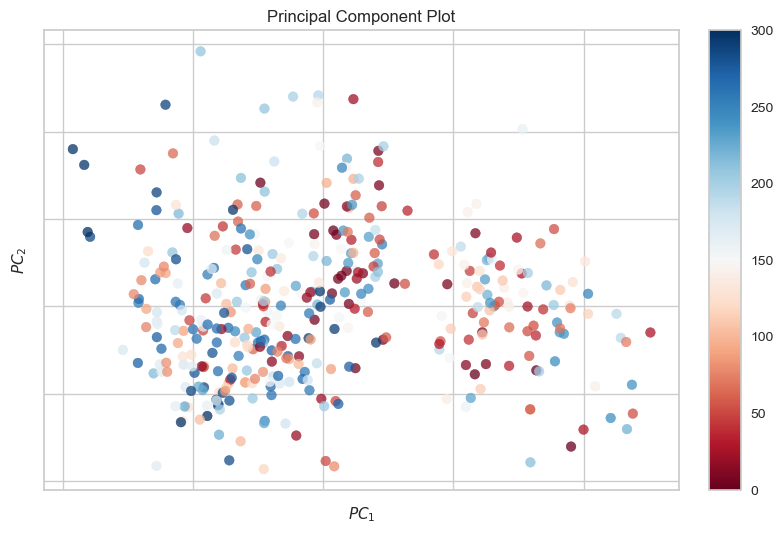

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [123]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, proj_features=False)
visualizer.fit_transform(X, y)
visualizer.show()

## 3-Choix  et application de la méthode de clustering

Après avoir faire la projection, nous allons maintenant faire notre clustering.
Il y a plusieurs méthodes comme Kmeans, DBSCAN, CAH... Dans notre étude nous allons appliquer le Kmeans.
Pour determiner le nombre optimal de clusters, nous allons utiliser la méthode du coude (Elbow method).

C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Etudiant\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The d

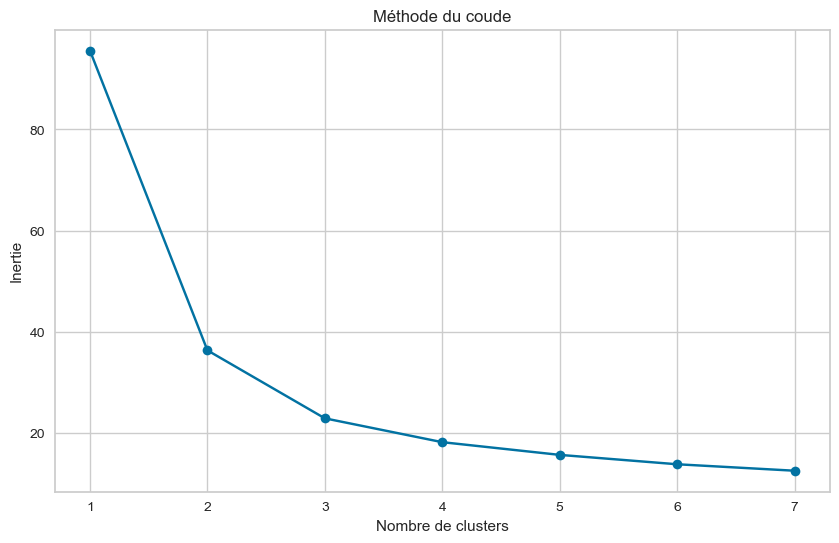

In [124]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertie = []

# Nombre de clusters à tester
K = range(1, 8)


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertie.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(K, inertie, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.xticks(K)
plt.grid(True)
plt.show()


L'inertie diminue à mesure que le nombre de clusters augmente. Le point du coude est soit 3 ou 4, on peut choisir 4 car à partie de cette valeur la courbe devient presque stationnaire. On considère k=4 comme optimal pour notre clustering

## 4- Visualisation des clusters en 2D

On applique maintenant notre Kmeans et on fait la visualisation

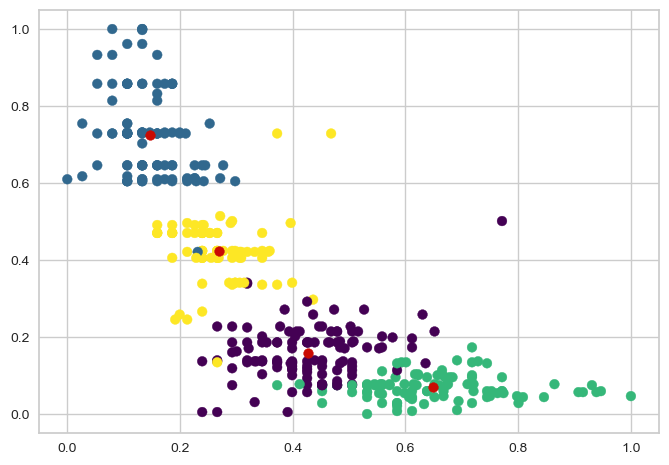

In [125]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,n_init=10,   max_iter=300,)
kmeans.fit(X)
kmeans.predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=kmeans.predict(X), cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r')

Nous avons 4 clusters qui sont chacun représentés par une couleur. on observe aussi le centre de chaque cluster. Les clusters semblent globalement bien séparés

In [126]:
kmeans.n_iter_

6

Le nombre d'itérations maximums  pour la convergence est 8

## 5-  Métriques d'évaluation

In [127]:
from sklearn.metrics import silhouette_score

silhouette= silhouette_score(X, kmeans.labels_)
print("Silhouette:", silhouette)

Silhouette: 0.36888424170728706


 La silhouette est de 0.37 ce indique que les cluster sont relativement bien définis et séparés les uns des autres. i.e en moyenne, les points de données sont plus proches des autres points de leur propre cluster que des points des autres clusters. Cependant, la valeur n'est pas extrêmement élevée, ce qui suggère qu'il y a encore une certaine ambiguïté dans le clustering.

Qu'avons nous si nous choisissons le nombre de clusters égale à 3?

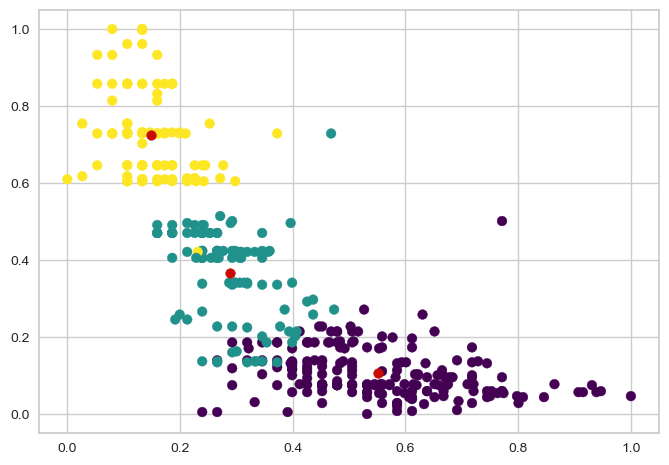

In [128]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,n_init=10,   max_iter=300,)
kmeans.fit(X)
kmeans.predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=kmeans.predict(X), cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r')

In [129]:
from sklearn.metrics import silhouette_score

silhouette= silhouette_score(X, kmeans.labels_)
print("Silhouette:", silhouette)

Silhouette: 0.42307033666970356


Avec un k=3, la silhouette est de 0.42 qui est bien mieux

## Conclusion

L'utilisation de l'ACP nous a permis de projeter les données dans un espace 2D, facilitant ainsi la visualisation des clusters. Nous avons pu appliquer par la suite la méthode de Kmeans pour identifier nos 4 clusters dans l'espace 2D, ce qui nous a aidé à mieux comprendre la structure des données. Nos clusters semblent etre bien separés d'une vue globale. 

Pour pouvoir évaluer la qualité de notre clustering, nous avons calculé la silhouette moyenne qui est de 0.37. Mais pour k=3 on a une petite amélioration de la qualité du clustering. Cependant il serait intéressant de considérer d'autres métriques comme l'index Calinski-Harabasz etre sur de la qualité du clustering.

En plus de K-means, d'autres méthodes de clustering comme le clustering hiérarchique ou le DBSCAN pourraient être explorées pour comparer les résultats et obtenir une meilleure compréhension de la structure des données.